In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data_root = r"C:\Users\hmand\OneDrive\Documents\GitHub\butt-munchers\data"
plots_root = r"C:\Users\hmand\OneDrive\Documents\GitHub\butt-munchers\plots"
managers = ["Eric W", "Hank M", "Evan Culbert", "Dylan Hochstetler", "Sam Bunz", "Dirk Opland", "Zach Crane", "Brad Neese", "Faisal Alabsi", "Matthew Knoedel", "Jacob Blum", "Brian Ross"]
years = [2019, 2020]

In [27]:
players = pd.read_excel(data_root + r"\buttmunchers.xlsx", sheet_name="Player Data Breakout")
games = pd.read_excel(data_root + r"\buttmunchers.xlsx", sheet_name="Buttmuncher Games")
print(players.head)

<bound method NDFrame.head of       Year                          Title                      Team Name  \
0     2019                     NFL Week 1  Javaris Jamar Javarison-Lamar   
1     2019                     NFL Week 1  Javaris Jamar Javarison-Lamar   
2     2019                     NFL Week 1  Javaris Jamar Javarison-Lamar   
3     2019                     NFL Week 1  Javaris Jamar Javarison-Lamar   
4     2019                     NFL Week 1  Javaris Jamar Javarison-Lamar   
...    ...                            ...                            ...   
5886  2020  Playoff Round 2 (NFL Week 15)            Demaryius Targaryen   
5887  2020  Playoff Round 2 (NFL Week 15)            Demaryius Targaryen   
5888  2020  Playoff Round 2 (NFL Week 15)            Demaryius Targaryen   
5889  2020  Playoff Round 2 (NFL Week 15)            Demaryius Targaryen   
5890  2020  Playoff Round 2 (NFL Week 15)            Demaryius Targaryen   

         Managers Starter or Bench   Slot          Player

In [6]:
weeks = ["NFL Week " + str(i) for i in range(1,14)]

['NFL Week 1', 'NFL Week 2', 'NFL Week 3', 'NFL Week 4', 'NFL Week 5', 'NFL Week 6', 'NFL Week 7', 'NFL Week 8', 'NFL Week 9', 'NFL Week 10', 'NFL Week 11', 'NFL Week 12', 'NFL Week 13']


In [30]:
best_weekly_score = {name : [] for name in managers}
weekly_score_differential = {name : [] for name in managers}
best_weekly_scores = []
years = [2020]
for year in years :
    for week in weeks :
        for manager in managers :
            df = players.loc[(players["Year"] == year) & (players["Title"] == week) & (players["Managers"] == manager)]
            # Pick best QB
            best_qb = df.loc[df["Player Position"] == "QB"].nlargest(1, "Total Points")
            if not best_qb.empty :
                df.drop(labels=best_qb.index, inplace=True)
                best_qb.reset_index(inplace=True)
                best_qb = best_qb.at[0,"Total Points"]
            else :
                best_qb = 0
            # Pick best 2 RBs
            best_rbs = df.loc[df["Player Position"] == "RB"].nlargest(2, "Total Points")
            df.drop(labels=best_rbs.index, inplace=True)
            best_rbs.reset_index(inplace=True)
            try :
                best_rbs_1 = best_rbs.at[0,"Total Points"]
                best_rbs_2 = best_rbs.at[1,"Total Points"]
            except :
                print(manager)
                break
            # Pick best 2 WRs
            best_wrs = df.loc[df["Player Position"] == "WR"].nlargest(2, "Total Points")
            df.drop(labels=best_wrs.index, inplace=True)
            best_wrs.reset_index(inplace=True)
            best_wrs_1 = best_wrs.at[0,"Total Points"]
            best_wrs_2 = best_wrs.at[1,"Total Points"]
            # Pick best TE
            best_te = df.loc[df["Player Position"] == "TE"].nlargest(1, "Total Points")
            if not best_te.empty :
                df.drop(labels=best_te.index, inplace=True)
                best_te.reset_index(inplace=True)
                best_te = best_te.at[0,"Total Points"]
            else :
                best_te = 0
            # Pick best Kicker
            best_kicker = df.loc[df["Player Position"] == "K"].nlargest(1, "Total Points")
            if not best_kicker.empty :
                df.drop(labels=best_kicker.index, inplace=True)
                best_kicker.reset_index(inplace=True)
                best_kicker = best_kicker.at[0,"Total Points"]
            else :
                best_kicker = 0
            # Pick best D/ST
            best_d = df.loc[df["Player Position"] == "D/ST"].nlargest(1, "Total Points")
            if not best_d.empty :
                df.drop(labels=best_d.index, inplace=True)
                best_d.reset_index(inplace=True)
                best_d = best_d.at[0,"Total Points"]
            else :
                best_d = 0
            # Pick best Flex of remaining players
            best_flex = df.loc[(df["Player Position"] == "RB") | (df["Player Position"] == "WR") | (df["Player Position"] == "TE")].nlargest(1, "Total Points")
            if not best_flex.empty :
                df.drop(labels=best_flex.index, inplace=True)
                best_flex.reset_index(inplace=True)
                best_flex = best_flex.at[0,"Total Points"]
            else :
                best_flex = 0
            best_score = round(best_qb + best_rbs_1 + best_rbs_2 + best_wrs_1 + best_wrs_2 + best_te + best_flex + best_d + best_kicker, 2)
            actual = games.loc[(games["Year"] == year) & (games["Title"] == week) & (games["Managers"] == manager)]
            actual.reset_index(inplace=True)
            actual = actual.at[0,"Score"]
            best_weekly_score[manager].append(best_score)
            weekly_score_differential[manager].append(round(best_score - actual,2))
print(best_weekly_score)
print(weekly_score_differential)

{'Eric W': [120.18, 100.3, 125.24, 122.32, 79.02, 125.64, 107.96, 106.86, 148.4, 87.16, 83.9, 107.68, 122.6], 'Hank M': [130.1, 113.68, 96.92, 104.84, 120.12, 86.24, 123.58, 144.7, 119.98, 63.54, 83.7, 83.0, 128.56], 'Evan Culbert': [116.06, 115.1, 138.42, 105.08, 142.16, 71.4, 155.62, 85.14, 87.7, 105.5, 103.84, 110.34, 114.9], 'Dylan Hochstetler': [110.16, 129.96, 137.18, 112.06, 109.9, 82.24, 92.66, 91.46, 113.92, 110.24, 100.06, 103.4, 58.8], 'Sam Bunz': [110.2, 124.04, 117.5, 124.82, 134.1, 91.12, 147.3, 77.88, 93.32, 105.7, 114.06, 99.6, 85.02], 'Dirk Opland': [82.7, 140.78, 135.9, 144.92, 99.46, 85.58, 126.62, 77.98, 101.64, 137.02, 93.72, 112.04, 85.98], 'Zach Crane': [134.3, 116.72, 105.1, 113.42, 93.34, 113.44, 84.86, 131.14, 106.76, 102.48, 115.6, 147.3, 108.78], 'Brad Neese': [116.12, 103.08, 106.54, 90.5, 107.86, 85.9, 81.76, 64.22, 86.24, 51.62, 116.76, 109.32, 102.44], 'Faisal Alabsi': [96.2, 107.88, 133.9, 95.34, 143.3, 139.6, 107.7, 133.34, 93.18, 107.22, 121.42, 135.7

In [43]:
diff_df = pd.DataFrame.from_dict(weekly_score_differential)
diff_med_df = diff_df.median()
diff_med_df = diff_med_df.sort_values()
new_dict = {}
for val in diff_med_df.index :
    new_dict[val] = weekly_score_differential[val]
diff_df = pd.DataFrame.from_dict(new_dict)

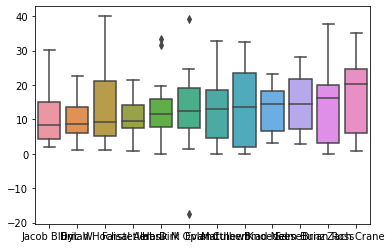

In [44]:
ax = sns.boxplot(data=diff_df)